# ATTACHING MAIN PACKAGES

In [2]:
import os
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")       # optional aesthetics
%matplotlib inline 

# READING THE DATA

In [3]:
data_path = "C:\\Users\\dimet\\OneDrive - NOVAIMS\\NOVA IMS BDMWDS\\0 Data"

In [4]:
# Function to load each Excel file into its own DataFrame
def load_excel_dataframe(filename: str, sheet_name: str) -> pd.DataFrame:
    """
    Load a sheet from an Excel file into a pandas DataFrame.
    Prints the shape on success or an error message on failure.
    """
    file_path = os.path.join(data_path, filename)
    try:
        df = pd.read_excel(file_path, sheet_name=sheet_name)
        print(f"Loaded '{sheet_name}' from '{filename}' (shape: {df.shape})")
        return df
    except Exception as e:
        print(f"Error loading '{sheet_name}' from '{filename}': {e}")
        return pd.DataFrame()

In [5]:
# Load DataFrames
df = load_excel_dataframe("Policy.xlsx", "policies_data")

Loaded 'policies_data' from 'Policy.xlsx' (shape: (13365, 26))


# 1. Quick first look 

In [6]:
print("Shape:", df.shape)
display(df.head())
display(df.tail())

Shape: (13365, 26)


,policy_number,policy_continuation_date,policy_start_date,policy_lastchange_date,premium_wa,premium_other,zipcode_link,zip4,place_residence,birth_date,...,brand,builddate_car,weight_car,mileage_car,power_car,fuel_car,chassis,drive,turbo,transmission
0,11948,2020-03-24,2004-03-24,2019-03-23,752.45,963.17,15583,1713,OBDAM,1977-10-01,...,SUZUKI,2019-03-01,1065.0,20,82.0,GASOLINE,SUV,FWD,YES,MANUAL
1,11949,2020-05-28,2004-05-28,2015-05-28,526.99,454.47,15584,3223,HELLEVOETSLUIS,1967-08-01,...,CITROEN,2011-12-01,805.0,20,50.0,GASOLINE,HATCHB.,FWD,NO,MANUAL
2,11950,2020-01-01,2004-01-01,2015-07-15,1000.60,1098.17,15585,3312,DORDRECHT,1954-04-01,...,HYUNDAI,2015-06-01,1168.0,15,99.0,GASOLINE,HATCHB.,FWD,NO,MANUAL
3,11951,2020-04-01,2002-04-01,2018-04-01,NaN,262.42,15586,6524,NYMEGEN,1944-10-01,...,Eriba,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11952,2020-10-01,2001-11-21,2019-10-01,561.68,64.80,15587,6215,MAASTRICHT,1950-09-01,...,SUZUKI,2001-01-01,705.0,15,NaN,GASOLINE,NaN,NaN,NaN,NaN


,policy_number,policy_continuation_date,policy_start_date,policy_lastchange_date,premium_wa,premium_other,zipcode_link,zip4,place_residence,birth_date,...,brand,builddate_car,weight_car,mileage_car,power_car,fuel_car,chassis,drive,turbo,transmission
13360,25060,2020-01-01,2018-01-01,2018-11-29,1424.63,3407.45,17403,2548,S GRAVENHAGE,1969-12-01,...,MERCEDES,2018-11-01,1580.0,UNKNOWN,143.0,DIESEL,SEDAN,RWD,YES,AUTOMATIC
13361,25061,2019-12-14,2017-12-14,2019-07-12,655.92,9.31,25609,7607,ALMELO,1987-04-01,...,PEUGEOT,2002-09-01,1117.0,15,55.0,GASOLINE,HATCHB.,FWD,NO,MANUAL
13362,25062,2018-12-15,2017-12-15,2018-01-25,871.45,29.11,22245,4827,BREDA,1966-08-01,...,MERCEDES,2001-03-01,995.0,15,60.0,GASOLINE,MPV,FWD,NO,MANUAL
13363,25063,2019-12-13,2017-12-13,2018-08-13,984.04,NaN,25515,2548,S GRAVENHAGE,1962-11-01,...,TOYOTA,1996-01-01,1100.0,15,85.0,GASOLINE,COUPE,FWD,NO,MANUAL
13364,25064,2019-12-19,2017-12-19,2017-12-19,895.37,289.36,23847,2665,BLEISWYK,1996-04-01,...,PEUGEOT,2011-06-01,805.0,15,50.0,GASOLINE,HATCHB.,FWD,NO,MANUAL


# 2. Metadata & basic hygiene 

In [7]:
# 2‑a) Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13365 entries, 0 to 13364
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   policy_number                13365 non-null  int64         
 1   policy_continuation_date     13364 non-null  datetime64[ns]
 2   policy_start_date            13331 non-null  datetime64[ns]
 3   policy_lastchange_date       13365 non-null  datetime64[ns]
 4   premium_wa                   13054 non-null  float64       
 5   premium_other                11899 non-null  float64       
 6   zipcode_link                 13365 non-null  int64         
 7   zip4                         13365 non-null  int64         
 8   place_residence              13365 non-null  object        
 9   birth_date                   13355 non-null  datetime64[ns]
 10  gender                       13348 non-null  object        
 11  private_commercial           13364 non-nu

In [8]:
# 2‑b) Missing‑value profile
missings = df.isna().sum().sort_values(ascending=False)
display(missings[missings > 0])

other_cover                    4546
premium_other_incl_discount    4545
drive                          1494
turbo                          1491
premium_other                  1466
transmission                   1462
power_car                      1117
worth_car                      1106
chassis                         914
weight_car                      599
builddate_car                   579
bonus_malus_percent             367
mileage_car                     343
fuel_car                        333
premium_wa                      311
policy_start_date                34
gender                           17
birth_date                       10
brand                             2
private_commercial                1
policy_continuation_date          1
dtype: int64

In [9]:
# 2‑c) Duplicate rows
dup_count = df.duplicated().sum()
print(f"Duplicate rows: {dup_count}")

Duplicate rows: 0


# 3. Summary statistics

In [10]:
# 3‑a) Numeric variables
display(df.describe().T)

,count,mean,min,25%,50%,75%,max,std
policy_number,13365.0,18363.741489,10295.0,15041.0,18382.0,21723.0,25064.0,3891.553388
policy_continuation_date,13364,2020-04-06 00:53:46.099970048,2014-12-23 00:00:00,2020-02-01 00:00:00,2020-05-29 00:00:00,2020-09-17 00:00:00,2020-11-30 00:00:00,NaN
policy_start_date,13331,2011-08-04 10:51:47.163753472,1990-06-16 00:00:00,2007-02-13 12:00:00,2011-11-01 00:00:00,2017-01-26 00:00:00,2019-11-01 00:00:00,NaN
policy_lastchange_date,13365,2017-04-15 02:55:43.838383616,2001-10-01 00:00:00,2016-04-29 00:00:00,2018-01-01 00:00:00,2019-01-01 00:00:00,2019-11-28 00:00:00,NaN
premium_wa,13054.0,843.724295,27.23,671.61,821.15,997.47,3343.34,270.544455
premium_other,11899.0,592.009312,0.01,139.7,492.81,917.585,7646.18,527.586518
zipcode_link,13365.0,19767.489487,10073.0,17161.0,19834.0,22749.0,25609.0,3552.714975
zip4,13365.0,4635.62544,1011.0,2729.0,3861.0,6846.0,9994.0,2402.639909
birth_date,13355,1968-12-17 22:28:07.997004868,1900-01-01 00:00:00,1954-08-01 00:00:00,1967-02-01 00:00:00,1986-01-01 00:00:00,1999-12-01 00:00:00,NaN
bonus_malus_percent,12998.0,69.316818,10.0,65.0,75.0,75.0,80.0,11.043999


In [11]:
# 3‑b) Categorical variables (top‑10 value counts each)
cat_cols = df.select_dtypes(include=["object", "category"]).columns
for c in cat_cols:
    print(f"\n--- {c} ---")
    display(df[c].value_counts(dropna=False).head(10))


--- place_residence ---


place_residence
ROTTERDAM       750
AMSTERDAM       521
S GRAVENHAGE    471
UTRECHT         276
ENSCHEDE        251
ARNHEM          201
ZOETERMEER      194
GRONINGEN       169
ALMERE          163
ALMELO          142
Name: count, dtype: int64


--- gender ---


gender
M      7593
F      5755
NaN      17
Name: count, dtype: int64


--- private_commercial ---


private_commercial
P      13351
Z         13
NaN        1
Name: count, dtype: int64


--- other_cover ---


other_cover
CAS    6150
NaN    4546
BEP    2669
Name: count, dtype: int64


--- brand ---


brand
VOLKSWAGEN    1462
RENAULT       1061
PEUGEOT       1047
OPEL          1027
TOYOTA         993
FORD           967
CITROEN        691
SUZUKI         571
FIAT           550
KIA            476
Name: count, dtype: int64


--- mileage_car ---


mileage_car
15         9293
20         2963
UNKNOWN     679
NaN         343
10           87
Name: count, dtype: int64


--- fuel_car ---


fuel_car
GASOLINE    11022
DIESEL       1589
NaN           333
HYBR/GAS      240
LPG           127
HYBRID         38
ELECTRIC        6
ALCOHOL         5
HYBR/DSL        4
UNKNOWN         1
Name: count, dtype: int64


--- chassis ---


chassis
HATCHB.    7892
COMBI      1269
MPV        1149
NaN         914
SUV         882
SEDAN       567
OTHER       263
VAN         138
SOFTTOP     119
COUPE        83
Name: count, dtype: int64


--- drive ---


drive
FWD        11170
NaN         1494
RWD          440
AWD          207
UNKNOWN       38
4WD           16
Name: count, dtype: int64


--- turbo ---


turbo
NO     8452
YES    3422
NaN    1491
Name: count, dtype: int64


--- transmission ---


transmission
MANUAL       9959
AUTOMATIC    1944
NaN          1462
Name: count, dtype: int64

# 4. Target variable & funnel conversion checks

In [13]:
premium_rate = df['premium_wa'].mean()
print(f"Premium rate: {premium_rate:0.5}")

Premium rate: 843.72


# 5. Univariate distributions

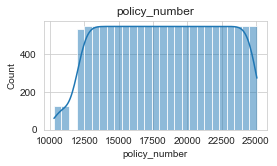

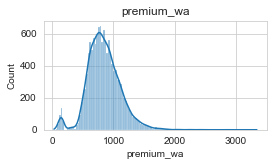

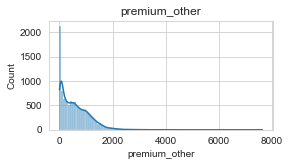

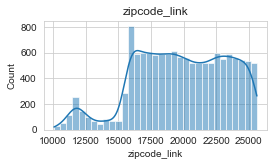

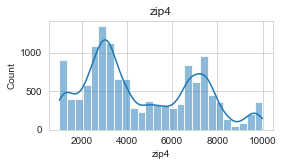

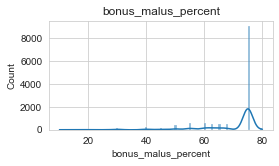

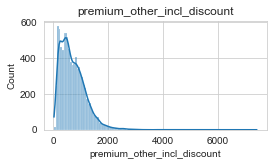

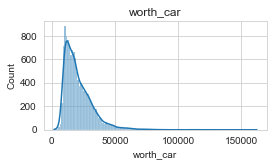

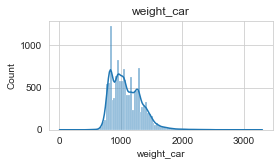

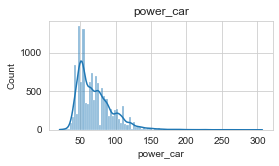

In [14]:
num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    plt.figure(figsize=(4,2))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(col)
    plt.show()

# 6. Bivariate relationships

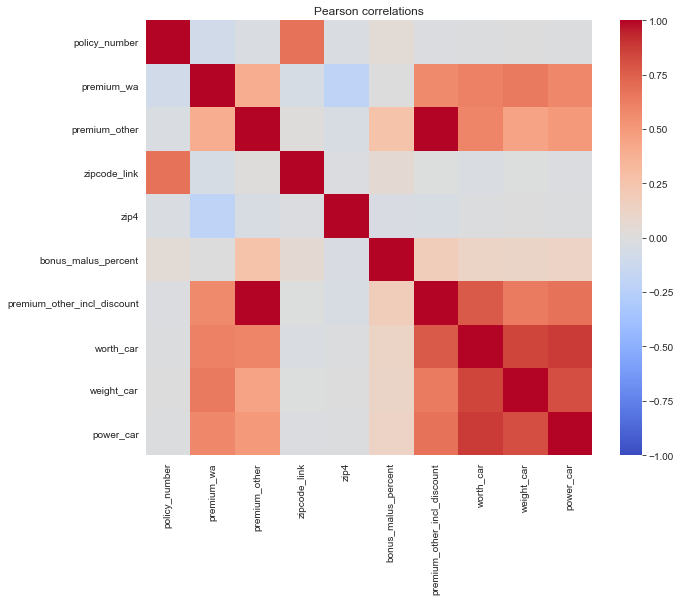

In [15]:
# 6‑a) Correlation heat‑map for numerics
plt.figure(figsize=(10,8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=False, cmap="coolwarm", vmax=1, vmin=-1)
plt.title("Pearson correlations")
plt.show()

# 7. Categorical vs. target

In [23]:
pd.pivot_table(
    df, values=["policy_number"],
    index=["gender"],
    columns=["private_commercial"],
    aggfunc="count",
)

policy_number   
private_commercial             P  Z
gender                             
F                           5754  1
M                           7588  4

In [25]:
pd.pivot_table(
    df, values=["premium_wa"],
    index=["gender"],
    columns=["place_residence"],
    aggfunc="mean",
)

premium_wa                                     \
place_residence 'S-GRAVENHAGE 'S-HEER ARENDSKERKE 'S-HEERENBROEK   
gender                                                             
F                  899.098205               472.7        1002.75   
M                  933.177895                 NaN            NaN   

                                                                              \
place_residence 'S-HERTOGENBOSCH 'T HARDE 'T ZAND  AALDEN AALSMEER AALST GLD   
gender                                                                         
F                     861.678333   830.61     NaN  600.11   961.95    874.42   
M                     794.415000      NaN  1145.5     NaN   852.12    852.89   

                        ...                                              \
place_residence AALSUM  ... ZWAANSHOEK ZWAMMERDAM ZWANENBURG ZWARTEWAAL   
gender                  ...                                               
F                  NaN  ...     979.48        NaN     790.88        NaN   
M                748.6  ...        NaN     703.38    1033.80    1046.25   

                                                                         \
place_residence ZWARTSLUIS  ZWEELOO ZWIJNDRECHT      ZWOLLE  ZWYNDRECHT   
gender                                                                    
F                   867.54  1092.61      934.44  693.878889  739.171818   
M                  1026.54      NaN         NaN  765.679545  894.286364   

                           
place_residence ZYDERVELD  
gender                     
F                  612.72  
M                     NaN  

[2 rows x 1294 columns]